# Chamber Temperature

The variation of chamber temperature with pressure and O/F ratio.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pypropep as ppp

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 130

In [2]:
OF = np.linspace(1, 8, 90)    # O/F ratio by mass
pc = np.array([1,5,10,15,20,25,30])   # Chamber pressure in bar

p_atm = 1.01325               # 1 bar to atm

In [3]:
# Initialise
ppp.init()

# Propellant set up
ipa = ppp.PROPELLANTS['ISOPROPYL ALCOHOL']
#water = ppp.PROPELLANTS['WATER']
n2o = ppp.PROPELLANTS['NITROUS OXIDE']

# Iterate
Tc = np.zeros([len(OF), len(pc)])
isp_froz = Tc.copy()
isp_shift = Tc.copy()

for i in range(len(OF)):
    for j in range(len(pc)):
        p_froz = ppp.FrozenPerformance()
        p_shift = ppp.ShiftingPerformance()

        p_froz.add_propellants_by_mass([(ipa, 1), (n2o, OF[i])])
        p_shift.add_propellants_by_mass([(ipa, 1), (n2o, OF[i])])

        # Set chamber pressure and exit pressure (atm)
        p_froz.set_state(P = pc[j]/p_atm, Pe = 1)                      
        p_shift.set_state(P = pc[j]/p_atm, Pe = 1)                      

        # Get specific impulse
        isp_froz[i,j] = p_froz.performance.Isp
        isp_shift[i,j] = p_shift.performance.Isp
        Tc[i,j] = p_froz.properties[0].T


Loaded 1921 thermo species
Loaded 1031 propellants


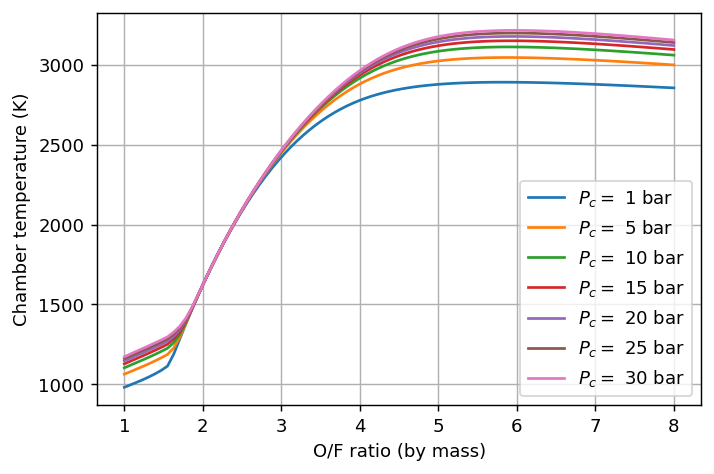

In [4]:
for j in range(len(pc)):
    plt.plot(OF, Tc[:,j], label = r"$P_c =$ "+f"{pc[j]} bar")

plt.ylabel("Chamber temperature (K)")
plt.xlabel("O/F ratio (by mass)")
plt.grid()
plt.legend()
plt.show()

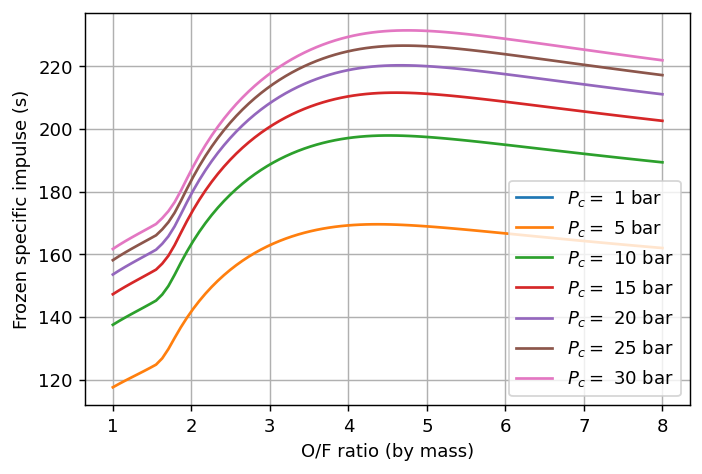

In [5]:
for j in range(len(pc)):
    plt.plot(OF, isp_froz[:,j]/9.81, label = r"$P_c =$ "+f"{pc[j]} bar")

plt.ylabel("Frozen specific impulse (s)")
plt.xlabel("O/F ratio (by mass)")
plt.grid()
plt.legend()
plt.show()

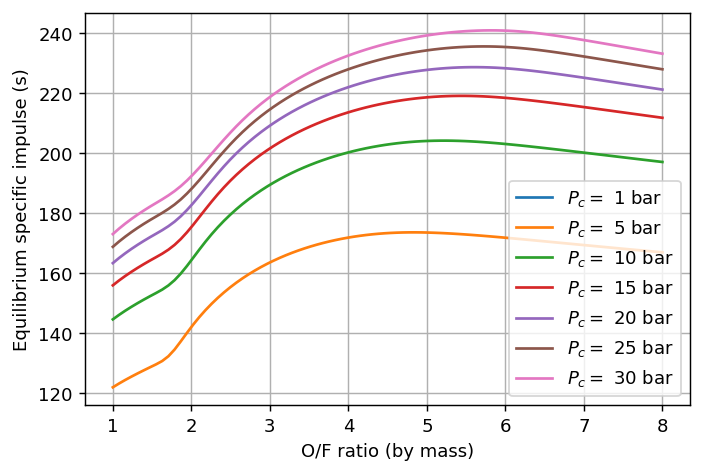

In [6]:
for j in range(len(pc)):
    plt.plot(OF, isp_shift[:,j]/9.81, label = r"$P_c =$ "+f"{pc[j]} bar")

plt.ylabel("Equilibrium specific impulse (s)")
plt.xlabel("O/F ratio (by mass)")
plt.grid()
plt.legend()
plt.show()